In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras import regularizers

In [2]:
X_train = np.load('c:\\Users\\user\\PycharmProjects\\tsc_ecg\\train_x.npy')
y_train = np.load('c:\\Users\\user\\PycharmProjects\\tsc_ecg\\train_y.npy')
X_test_real = np.load('c:\\Users\\user\\PycharmProjects\\tsc_ecg\\test_x.npy')

#split_data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.001, random_state=14)
np.random.seed(14)

X_train_df = pd.DataFrame(X_train)
X_train_df = X_train_df.T
y_train_df = pd.DataFrame(y_train)
y_train_df = y_train_df.T

X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.T
y_test_df = pd.DataFrame(y_test)
y_test_df = y_test_df.T

X_test_real_df = pd.DataFrame(X_test_real)

In [3]:
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,14642,14643,14644,14645,14646,14647,14648,14649,14650,14651
0,0.057895,1.000000,0.570248,1.000000,0.925081,0.246057,0.833992,0.995223,1.000000,0.937198,...,1.000000,0.250000,0.973430,1.000000,1.000000,0.923077,0.969499,1.000000,1.000000,1.000000
1,0.021053,0.892086,0.049587,0.892139,0.840391,0.345426,0.905138,0.996815,0.800000,0.881643,...,0.811475,0.795455,0.919082,0.953368,0.771505,1.000000,0.877996,0.930147,0.932011,0.942446
2,0.215789,0.669065,0.082645,0.636197,0.130293,0.400631,0.644269,0.434713,0.322078,0.217391,...,0.598361,0.977273,0.844203,0.563040,0.556452,0.467775,0.660131,0.483456,0.725212,0.654676
3,0.247368,0.413669,0.276859,0.363803,0.035831,0.463722,0.166008,0.068471,0.077922,0.026570,...,0.418033,0.196970,0.768116,0.089810,0.344086,0.056133,0.427015,0.031250,0.555241,0.316547
4,0.478947,0.169065,0.384298,0.118830,0.061889,0.556782,0.000000,0.296178,0.080519,0.173913,...,0.281421,0.022727,0.677536,0.044905,0.193548,0.037422,0.206972,0.101103,0.522663,0.212230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


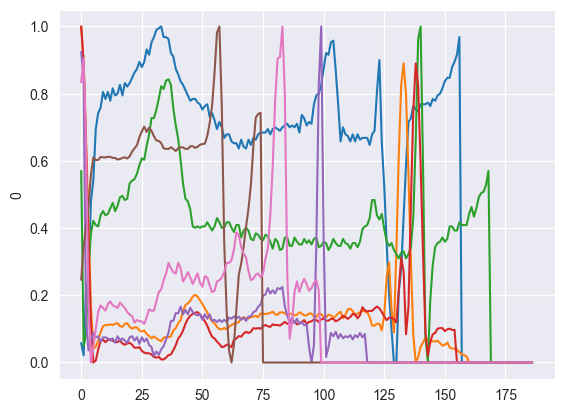

In [4]:
for i in range(7):
    sns.lineplot(data=X_train_df[i])

In [5]:
imbalance = y_train_df.T.value_counts()
print(imbalance)
imbalance_test = y_test_df.T.value_counts()
print(imbalance_test)

0.0    12091
4.0     1089
2.0      992
1.0      378
3.0      102
dtype: int64
0.0    11
4.0     2
2.0     1
3.0     1
dtype: int64


In [6]:
imb = []
num_class = 5
for i in range(num_class):
    imb.append(int(imbalance[0] / imbalance[i]))
imb

[1, 31, 12, 118, 11]

In [7]:
'''
X_train_over_sampling = []
y_train_over_sampling = []

for i in range(len(X_train)):
    X_train_over_sampling.append(X_train[i])
    y_train_over_sampling.append(y_train[i])
    if y_train[i] != 0:
        for repeat in range(imb[int(y_train[i])]):
        #for repeat in range(10):
            arr = []
            for c in range(len(X_train[i])):
                value = 0.0
                if X_train[i][c] == 0.0 or X_train[i][c] == 1.0:
                    value = X_train[i][c]
                else:
                    value = X_train[i][c] + (np.random.random() * 0.00001)
                if value > 1.0:
                    value = 1.0
                if value < 0.0:
                    value = 0.0
                arr.append(value)

            X_train_over_sampling.append(arr)
            y_train_over_sampling.append(y_train[i])

X_train_over_sampling = np.array(X_train_over_sampling)
y_train_over_sampling = np.array(y_train_over_sampling)

X_train, y_train = shuffle(X_train_over_sampling, y_train_over_sampling, random_state=14)
X_train
'''

array([[1.        , 0.8300181 , 0.52260399, ..., 0.        , 0.        ,
        0.        ],
       [0.91558738, 0.86689184, 0.80087361, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.96083433, 0.78341813, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.76095127, 0.66499196, 0.54209657, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.81633558, 0.1039033 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.79411763, 0.55514705, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
#one_hot_encoding
y_train = tf.keras.utils.to_categorical(y_train, 5)
y_train
y_test = tf.keras.utils.to_categorical(y_test, 5)
y_test

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [7]:
print(X_train.shape)
print(X_test.shape)

(14652, 187)
(15, 187)


In [8]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout, MaxPooling1D

MAX_NB_VARIABLES = 1
MAX_TIMESTEPS = 187
NB_CLASS = 5

BATCH_SIZE    = 128
LEARNING_RATE = 1e-2

TRAINABLE = True

In [9]:
def generate_model():
    ip = Input(shape=(MAX_TIMESTEPS, MAX_NB_VARIABLES))

    x = Masking()(ip)
    x = LSTM(128)(x)
    x = Dropout(0.7)(x)

    y = Permute((2, 1))(ip)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = squeeze_excite_block(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = squeeze_excite_block(y)

    y = Conv1D(64, 3, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)


    a = Permute((2, 1))(ip)
    a = Conv1D(64, 16, padding='same', kernel_initializer='he_uniform')(a)
    a = BatchNormalization()(a)
    a = Activation('relu')(a)
    a = MaxPooling1D(2, padding='same')(a)

    a = Conv1D(32, 5, padding='same', kernel_initializer='he_uniform')(a)
    a = BatchNormalization()(a)
    a = Activation('relu')(a)

    a = Conv1D(16, 3, padding='same', kernel_initializer='he_uniform')(a)
    a = BatchNormalization()(a)
    a = Activation('relu')(a)

    a = GlobalAveragePooling1D()(a)


    x = concatenate([x, y, a])

    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.7)(x)

    out = Dense(NB_CLASS, activation='softmax')(x)

    model = Model(ip, out)
    model.summary()

    # add load model code here to fine-tune

    return model

def squeeze_excite_block(input):
    ''' Create a squeeze-excite block
    Args:
        input: input tensor
        filters: number of output filters
        k: width factor
    Returns: a keras tensor
    '''
    #filters = input._keras_shape[-1] # channel_axis = -1 for TF
    filters = input.shape[-1] # channel_axis = -1 for TF

    se = GlobalAveragePooling1D()(input)
    se = Reshape((1, filters))(se)
    se = Dense(filters // 16,  activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    se = multiply([input, se])
    return se

In [10]:
model = generate_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 permute (Permute)              (None, 1, 187)       0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 1, 128)       191616      ['permute[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 1, 128)      512         ['conv1d[0][0]']                 
 alization)                                                                                   

In [11]:
f1_score_macro = tfa.metrics.F1Score(num_classes=5, average='macro')

In [12]:
# параметры данной ячейки могут быть изменены для получения более высокой точности
optim_1 = tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=LEARNING_RATE, decay_steps=1000, decay_rate=0.2))
optim_2 = tfa.optimizers.LAMB(weight_decay=0.01)

model.compile(optimizer=optim_2,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy', f1_score_macro]
)

In [13]:
# обучения модели
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=BATCH_SIZE,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(filepath="{epoch:02d}-{val_loss:.3f}-{val_accuracy:.3f}-{val_f1_score:.3f}.hdf5", save_freq = 'epoch'),

    ],
    use_multiprocessing=True,
    workers=8,
    epochs=1024
)

Epoch 1/1024
115/115 [==============================] - 83s 629ms/step - loss: 1.4082 - accuracy: 0.6291 - f1_score: 0.3471 - val_loss: 1.1268 - val_accuracy: 0.7333 - val_f1_score: 0.1692
Epoch 2/1024
115/115 [==============================] - 78s 679ms/step - loss: 0.3547 - accuracy: 0.9212 - f1_score: 0.5964 - val_loss: 0.9098 - val_accuracy: 0.7333 - val_f1_score: 0.1692
Epoch 3/1024
115/115 [==============================] - 73s 636ms/step - loss: 0.2562 - accuracy: 0.9412 - f1_score: 0.6980 - val_loss: 0.7555 - val_accuracy: 0.8000 - val_f1_score: 0.3167
Epoch 4/1024
115/115 [==============================] - 74s 640ms/step - loss: 0.1863 - accuracy: 0.9520 - f1_score: 0.7537 - val_loss: 0.9283 - val_accuracy: 0.8000 - val_f1_score: 0.3093
Epoch 5/1024
115/115 [==============================] - 76s 663ms/step - loss: 0.1689 - accuracy: 0.9558 - f1_score: 0.7680 - val_loss: 0.8459 - val_accuracy: 0.7333 - val_f1_score: 0.3000
Epoch 6/1024
115/115 [==============================] -

KeyboardInterrupt: 

In [24]:
reconstructed_model = tf.keras.models.load_model("17-0.561-0.933-0.591.hdf5")

In [25]:
y_pred = reconstructed_model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [26]:
#y_pred = model.predict(X_test)

In [27]:
y_pred
am_y_pred = y_pred.argmax(1)
am_y_pred

array([4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0], dtype=int64)

In [28]:
y_test
am_y_test = y_test.argmax(1)
am_y_test

array([4, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0], dtype=int64)

In [29]:
f1_score(am_y_test, am_y_pred, average="macro")

0.7391304347826086

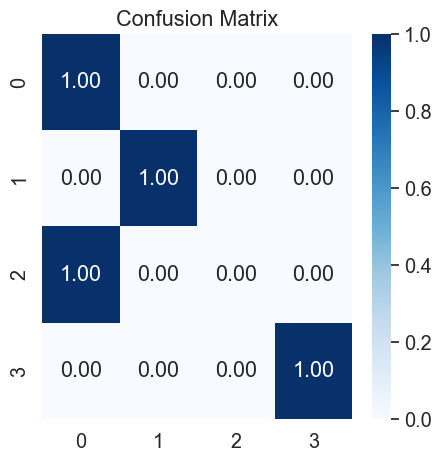

In [30]:
def cm_plot(y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cmn, cmap='Blues', annot=True, fmt='.2f')
    sns.set(font_scale=1.3)
    plt.title("Confusion Matrix")

    return plt.show()

cm_plot(am_y_test, am_y_pred)

In [31]:
#y_pred = model.predict(X_test_real)
y_pred = reconstructed_model.predict(X_test_real)

226/226 [==============================] - 25s 109ms/step


In [32]:
y_pred = y_pred.argmax(1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import f1_score
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission.csv", index=False)
y_pred_csv

,ID,Answer
0,0,0
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
7220,7220,0
7221,7221,2
7222,7222,0
7223,7223,0
